In [45]:
!pip install pandas
!pip install matplotlib
!pip install numpy

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import math

In [47]:
nOfPoints = 500 #amount of points S /n
fraction = 0.0 #outlier fraction f, those are the dots that don't belong. Default is 0)
codes = [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)] #T, the triangle
path = Path(vertices, codes)
areaOfCircles = 20

In [48]:
def change_color(xCoordinates, yCoordinates, fraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < fraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [49]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(xCoordinates, yCoordinates, fraction)
    df = pd.DataFrame({"x":xCoordinates, "y":yCoordinates, "color":colors}, columns=["x","y","color"])
    return df

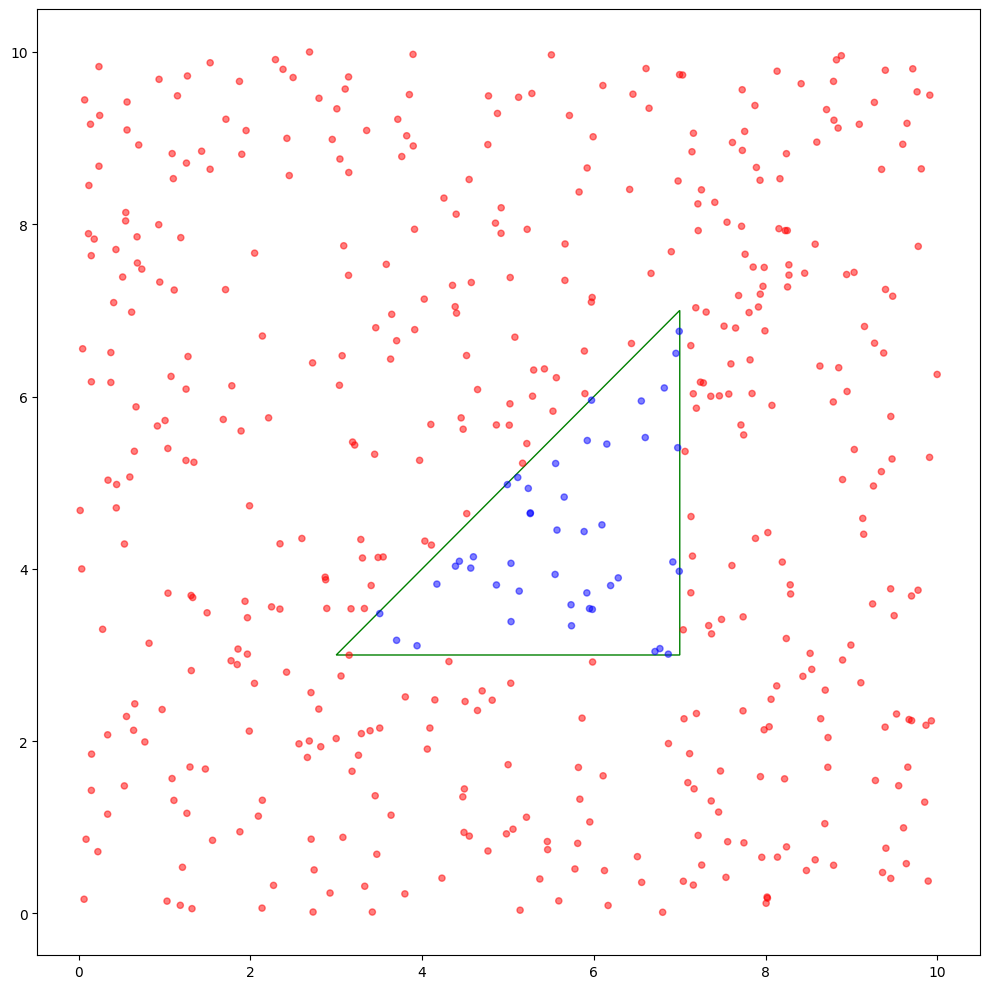

In [50]:
df = generate_points(nOfPoints)
fig, axs = plt.subplots(1, 1,figsize=(10, 10),tight_layout=True) #Size of the figure 10x10 aka Q
pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
axs.add_patch(pathpatch)
plt.scatter(df["x"], df["y"], s=areaOfCircles, c=df["color"], alpha=0.5)
axs.autoscale_view()
plt.show()

In [51]:
def find_KNN(df, point, k):
    df['dist'] = np.sqrt((df['x'].to_numpy() - point['x'])**2 + (df['y'].to_numpy() - point['y'])**2)
    df.sort_values('dist', ignore_index=True, inplace=True)
    return df[:k]

In [52]:
point = pd.DataFrame([[6,6]],columns=['x','y'])
print(find_KNN(df,point.iloc[0],4)['color'].mode()[0])

red


In [53]:
testPoints = generate_points(1000)
nOfTrueColors = 0
for index, row in testPoints.iterrows():
    knnColor = find_KNN(df, row, 4)['color'].mode()[0]
    if knnColor == row['color']:
        nOfTrueColors += 1
print(nOfTrueColors/1000)

0.974


In [54]:

def test_Fractions(Fractions, repeats):
    outcome = []
    global fraction
    for F in Fractions:
        fraction = F
        repeatOutcomes = []
        for r in range(repeats):
            S = generate_points (nOfPoints)
            testPoints = generate_points(10000)
            misclass = 0 #the number of misclassifications

            # 
            for index, row in testPoints.iterrows(): 
                knnColor = find_KNN(S, row, 5)['color'].mode()[0] #find the 5 nearest points. 
                if knnColor != row['color']: #if the color is not the same as the color the dot is...
                    misclass +=1                #Add one misclassification
            repeatOutcomes.append(misclass)     #all miscalculations

        #Average & standard deviation of all the outcomes
        outcome.append((np.average(repeatOutcomes),np.std(repeatOutcomes))) #std = standard defiantion. 
    
    return outcome

In [55]:
fractionsList = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
FractionOutcomes = test_Fractions(fractionsList, 20)

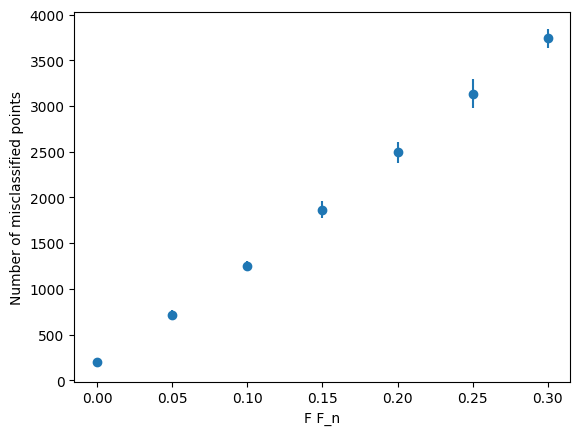

In [58]:

plt.errorbar(fractionsList,[y[0] for y in FractionOutcomes],[yerr[1] for yerr in FractionOutcomes], linestyle='None',marker='o')
plt.xlabel("F F_n")
plt.ylabel("Number of misclassified points")
plt.show()

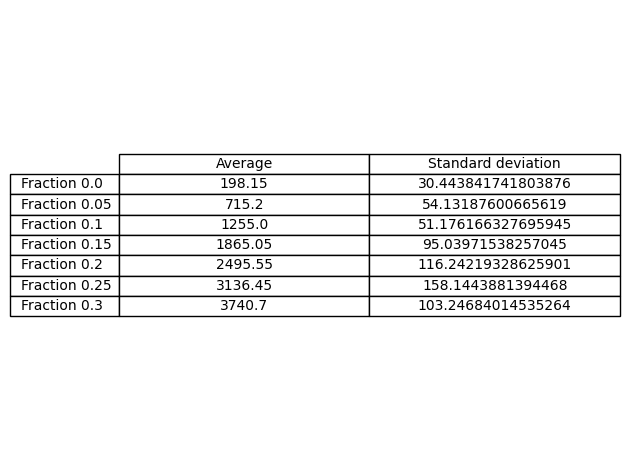

In [59]:
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(FractionOutcomes,rowLabels=["Fraction " + str(t) for t in fractionsList],colLabels=["Average", "Standard deviation"],loc='center',cellLoc='center')
fig.tight_layout()
plt.show()